# Information Extraction From the Corpus:🧐🧐🧐

Corpus is the collection of the different chunks that is used to collect the information for a particular thing. To Extraction of the information from the corpus is important task 
- that will help to know the most used words from the corpus,
- it will also help to fix the title of the corpus and 
- it will rwduce the size of the corpus but the meaning not change.

##   👷‍♂️👷‍♂️👷‍♂ Library : Spacy  👷‍♂️👷‍♂️👷‍♂

Spacy is the main library when we deal with copus here we deal with english corpus that why we load "en_core_web_lg".
This module will collect all the english grammers definition in it.
by using this we can easily understand about parts of sppech of the corpus.

In [4]:
import spacy
nlp = spacy.load('en_core_web_lg')

#### Spitting the tokens

In [12]:
s = 'GPT is one the first of its kind AGI'

d = nlp(s)

In [16]:
type(d[0])

spacy.tokens.token.Token

In [17]:
d[0].text

'GPT'

#### Finding the parts of speech

In [19]:
d[0].pos_               ### it is proper noun

'PROPN'

In [21]:
d[4],  d[4].pos_

(first, 'ADJ')

In [23]:
for i in range(len(d)):
    print(d[i] ,'  : ', d[i].pos_)

GPT   :  PROPN
is   :  AUX
one   :  NUM
the   :  DET
first   :  ADJ
of   :  ADP
its   :  PRON
kind   :  ADJ
AGI   :  PROPN


#### Finding Grained Parts of Speech

In [25]:
for i in range(len(d)):
    print(d[i], ' : ', d[i].tag_)

GPT  :  NNP
is  :  VBZ
one  :  CD
the  :  DT
first  :  JJ
of  :  IN
its  :  PRP$
kind  :  JJ
AGI  :  NNP


#### Spacy.explain(): Used to explain each token

In [29]:
for token in d:
    print(f'{token.text:{15}}{token.pos_:{15}}{token.tag_:{15}}{spacy.explain(token.tag_)}')

GPT            PROPN          NNP            noun, proper singular
is             AUX            VBZ            verb, 3rd person singular present
one            NUM            CD             cardinal number
the            DET            DT             determiner
first          ADJ            JJ             adjective (English), other noun-modifier (Chinese)
of             ADP            IN             conjunction, subordinating or preposition
its            PRON           PRP$           pronoun, possessive
kind           ADJ            JJ             adjective (English), other noun-modifier (Chinese)
AGI            PROPN          NNP            noun, proper singular


#### Visualization Of Pats of Speech

In [31]:
from spacy import displacy

In [32]:
displacy.render(d, jupyter=True)

#### Visulization Of Parts of Speech || Adding Functions

In [34]:
displacy.render(d, jupyter=True, options={'distance':100,'color':'white','bg':'black','font':'times','compact':True})

In [35]:
displacy.render(d, jupyter=True, options={'distance':100,'color':'white','bg':'black','font':'times'})

In [39]:
displacy.render(d, jupyter=True, options={'distance':100,'color':'RGB(60,180,0)','bg':'RGB(50,50,0)','font':'times',})

## Name Entity Recognition
-  NER is one of the most data preprocessing task. It involves the identification of Keys information in text and classification into a set of predifened categories. An entity is basically the thing that is consistently talked about or refer to in the text

### Defining Entity Function

In [50]:
doc = nlp('GFG is an Indian organisation which provides one of the finest education.')

def show_entitis(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent,"|",ent.label_,"|", spacy.explain(ent.label_))
    else:
        print('No entites is find')
        
        
show_entitis(doc)    

GFG | ORG | Companies, agencies, institutions, etc.
Indian | NORP | Nationalities or religious or political groups


In [55]:
show_entitis(nlp("India is great country"))

India | GPE | Countries, cities, states


### Adding new Intites

In [64]:
from spacy.tokens import Span as sp

doc = nlp("I'm not feeling well.")

new_entity = sp(doc ,0,1, label = doc.vocab.strings['Person'])

doc.ents = list(doc.ents) + [new_entity]

show_entitis(doc)

I | Person | None


C:\Users\user\anaconda3\Lib\site-packages\spacy\glossary.py:20: UserWarning: [W118] Term 'Person' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))


### Add multiple thing into entity

In [65]:
from spacy.matcher import PhraseMatcher

doc = nlp('Playing Cricket and Football are both good for health')

m = PhraseMatcher(nlp.vocab)

phares = ['Cricket','Football']
pattern = [nlp(text) for text in phares]

m.add('Sports', None,*pattern)

show_entitis(doc)

No entites is find


In [66]:
from spacy.tokens import Span as sp

sport = doc.vocab.strings['Sports']

found = m(doc)

new_ent = [sp(doc ,match[1],match[2], label = sport) for match in found]

doc.ents = list(doc.ents) + new_ent

show_entitis(doc)

Cricket | Sports | None
Football | Sports | None


C:\Users\user\anaconda3\Lib\site-packages\spacy\glossary.py:20: UserWarning: [W118] Term 'Sports' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))


### Finding special tag words

In [68]:
doc = nlp('GFG, Google, Apple, Today')

show_entitis(doc)

GFG | ORG | Companies, agencies, institutions, etc.
Google | ORG | Companies, agencies, institutions, etc.
Apple | ORG | Companies, agencies, institutions, etc.
Today | DATE | Absolute or relative dates or periods


### Finding special kind of entietes

In [69]:
[ent for ent in doc.ents if ent.label_ == 'ORG']

[GFG, Google, Apple]

# Word-Cloud Library:
#### This library will help to find the important words from the corpus that will help to find the title or know the most important word of the corpus on the basis of the words plot the graph that will easily show the importance of the words from the corpus

## Word-Cloud Library

In [74]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [75]:
text = "Steven Paul Jobs was an American businessman, inventor, and investor best known for co-founding the technology giant Apple Inc. Jobs was also the founder of NeXT and chairman and majority shareholder of Pixar. He was a pioneer of the personal computer revolution of the 1970s and 1980s, along with his early business partner and fellow Apple co-founder Steve WozniakJobs was born in San Francisco in 1955 and adopted shortly afterwards. He attended Reed College in 1972 before withdrawing that same year. In 1974, he traveled through India, seeking enlightenment before later studying Zen Buddhism. He and Wozniak co-founded Apple in 1976 to further develop and sell Wozniak's Apple I personal computer. Together, the duo gained fame and wealth a year later with production and sale of the Apple II, one of the first highly successful mass-produced microcomputers. Jobs saw the commercial potential of the Xerox Alto in 1979, which was mouse-driven and had a graphical user interface (GUI). This led to the development of the unsuccessful Apple Lisa in 1983, followed by the breakthrough Macintosh in 1984, the first mass-produced computer with a GUI. The Macintosh launched the desktop publishing industry in 1985 with the addition of the Apple LaserWriter, the first laser printer to feature vector graphics and PostScript."

In [76]:
text

"Steven Paul Jobs was an American businessman, inventor, and investor best known for co-founding the technology giant Apple Inc. Jobs was also the founder of NeXT and chairman and majority shareholder of Pixar. He was a pioneer of the personal computer revolution of the 1970s and 1980s, along with his early business partner and fellow Apple co-founder Steve WozniakJobs was born in San Francisco in 1955 and adopted shortly afterwards. He attended Reed College in 1972 before withdrawing that same year. In 1974, he traveled through India, seeking enlightenment before later studying Zen Buddhism. He and Wozniak co-founded Apple in 1976 to further develop and sell Wozniak's Apple I personal computer. Together, the duo gained fame and wealth a year later with production and sale of the Apple II, one of the first highly successful mass-produced microcomputers. Jobs saw the commercial potential of the Xerox Alto in 1979, which was mouse-driven and had a graphical user interface (GUI). This led

In [77]:
wc = WordCloud().generate(text)

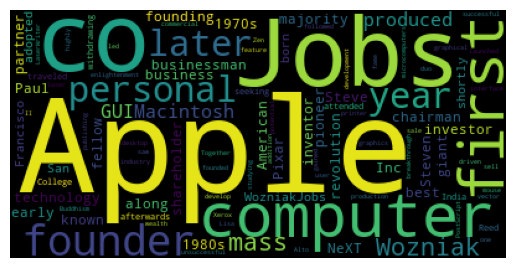

In [79]:
plt.imshow(wc)
plt.axis('off')
plt.show()

### Word Cloud in Details

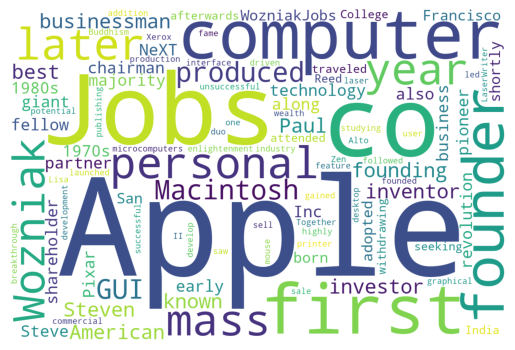

In [97]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

##txt = 'Steve Jobs was an American Entepreneur'

stopword = stopwords.words('english')

# stopword.append('Apple')
# stopword.append('Jobs')


wc = WordCloud(width = 1080, height = 720, margin=2, max_words=100, background_color='white', stopwords= stopword)


plt.imshow(wc.generate(text))
plt.axis('off')
plt.show()

#### <center><img src= 'https://media2.giphy.com/media/v1.Y2lkPTc5MGI3NjExbDhmYm9yZWZ0cjY0a2g4aXNrZDUzY2dkYnlwcm5kbzJmczFudWp5ZiZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/VO214ezJWYW9IEJVEo/giphy.gif' width="400"></center>

## Conclusion  🖊️🖊️🖊️🖊️🖊️

#### By using this library we can deal with the text wand many more things to be done by using this library functions.